In [1]:
"""
Necessary modules
"""
import sys, os
%load_ext autoreload
%autoreload 2 # autoreload to debug/modify modules
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from graphs.my_graph import * # my custom module for ~nice plots
# all figures will be saved to svg on the desktop for inclusions in multipanels
desktop = os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop')+os.path.sep
home = os.path.join(os.path.expanduser('~'), os.path.sep)

Blue, Orange, Green, Red, Purple, Brown, Pink, Grey,\
    Kaki, Cyan = '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',\
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
Inter = get_linear_colormap(Blue, Orange)(.5) # for the intermediate regime

class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

args = Namespace(percentile_for_freq_threshold=.5,
                 subsampling_period=10e-3,
                 window_freq=500e-3,
                 window=300e-3,
                 smoothing_for_freq=100e-3,
                 sliding=50e-3,
                 dataset='full', debug=True)        

In [3]:
from sparse_vs_balanced.exp_data import load_data, get_freq_threshold

In [4]:
data = load_data('sparse_vs_balanced/data/PV_Arch/Cell3/14401014.abf',args)

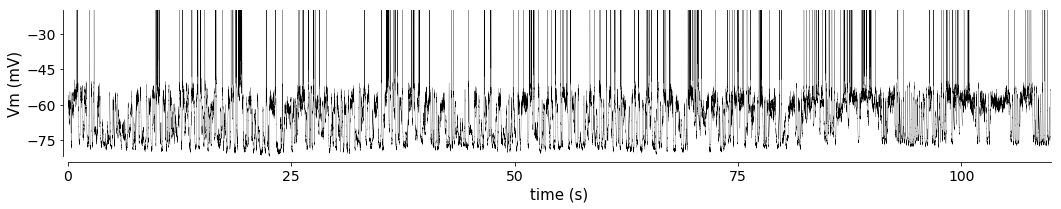

In [5]:
fig, ax = plt.subplots(figsize=(15,3.))
plt.subplots_adjust(bottom=.2, left=.08, right=.99)
ax.plot(data['t'][::10], data['Vm'][::10], 'k-', lw=.2)
set_plot(ax, ylabel='Vm (mV)', xlabel='time (s)',
                 xlim=[data['t'][0], data['t'][-1]],
         ylim=[data['Vm'].min(), -20])
fig.savefig('/Users/yzerlaut/Desktop/fig.png', transparent=True, dpi=100)

N.B. subsampling make appear spike smaller, see below plot


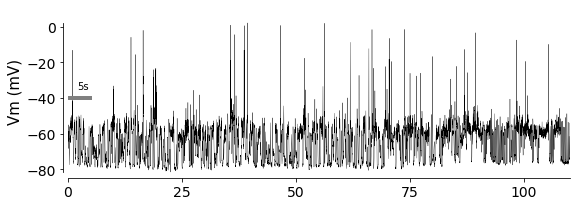

In [12]:
from sparse_vs_balanced.exp_data import visualize_full_trace
visualize_full_trace(data)
print('N.B. subsampling make appear spike smaller, see below plot')

In [8]:
get_freq_threshold(args)

1.26240273230346

/Users/yzerlaut/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


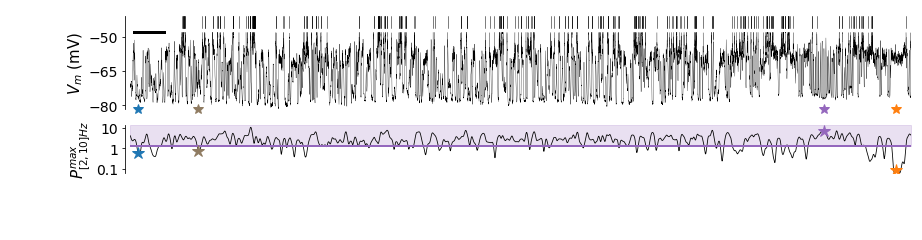

In [32]:
fig = make_full_trace_fig(data, t0=3, length=103.,\
                          SO_time = 154.5-60., SA_time = 64.-60.,
                          IA_time = 72.-60., BA_time = 164.-60.,
                          yaxis_cut=-48,
                          freq_threshold=get_freq_threshold(args))

In [33]:
fig.savefig(desktop+'temp.svg')

In [31]:
def make_full_trace_fig(data,
                        SO_time=0., SA_time=0., IA_time=0., BA_time=0.,
                        t0=0., length=30.,
                        yaxis_cut=-10.,
                        freq_threshold=1.):
    # plot
    fig = plt.figure(figsize=(14,3))
    ax = plt.subplot2grid((3,1), (0,0), rowspan=2)
    tcond = (data['sbsmpl_t']>t0) & (data['sbsmpl_t']<t0+length) & (data['sbsmpl_Vm']<yaxis_cut)
    ax.plot(data['sbsmpl_t'][tcond], data['sbsmpl_Vm'][tcond], 'k-', lw=.3)
    ispikes = np.argwhere((data['Vm'][1:]>-30) & (data['Vm'][:-1]<-30) &\
                          (data['t'][1:]>t0) & (data['t'][:-1]<t0+length)).flatten()
    for i in ispikes:
        cond = (data['t']>data['t'][i]-0.005) & (data['t']<data['t'][i]+0.01) &\
            (data['Vm']<yaxis_cut)
        ax.plot(data['t'][cond], data['Vm'][cond], 'k-', lw=.2)
        ax.plot(np.ones(2)*data['t'][i], [yaxis_cut+2, yaxis_cut+7], 'k-', lw=.5)
    Vmin = data['sbsmpl_Vm'][tcond].min()
    
    ax2 = plt.subplot2grid((3,1), (2,0))
    tcond = (data['t_muV']>t0) & (data['t_muV']<t0+length)
    ax2.semilogy(data['t_muV'][tcond], data['smooth_power_low_freq'][tcond], 'k-', lw=.8)
    ax2.semilogy([t0, t0+length], freq_threshold*np.ones(2), '-', color=Purple,
                 label='rythmicity threshold', lw=2)
    
    # adding points
    for time, label, color in zip([SO_time, SA_time, IA_time, BA_time],
                                   ['rythmic act.', 'low $\mu_V$',
                                   'interm. $\mu_V$', 'high $\mu_V$'],
                                   [Purple, Blue, Inter, Orange]):
        ax.plot([time],[Vmin], '*',color=color,label=label, ms=10)
        i0 = np.argmin((time-data['t_muV'])**2)
        ax2.semilogy([data['t_muV'][i0]], [data['smooth_power_low_freq'][i0]],
                     '*',color=color, ms=12)
        
    ax.plot([t0+.5, t0+4.5], yaxis_cut*np.ones(2), lw=3, color='k')
    ax.annotate('4s',(t0, -30), fontsize=14)
    set_plot(ax, ['left'], ylabel='$V_m$ (mV)',
             xticks=[], yticks=[-80, -65, -50], xlim=[t0, t0+length])
    set_plot(ax2, ['left'], ylabel='$P^{max}_{[2,10]Hz}$', xticks=[],
             xlim=[t0, t0+length], yticks=[0.1, 1, 10], yticks_labels=['0.1', '1', '10'])
    ax2.fill_between([t0, t0+length], freq_threshold*np.ones(2), np.ones(2)*ax2.get_ylim()[1],
                     color=Purple, alpha=.2)
    fig.savefig(desktop+'temp.svg')
    return fig

NameError: name 'SO_times' is not defined

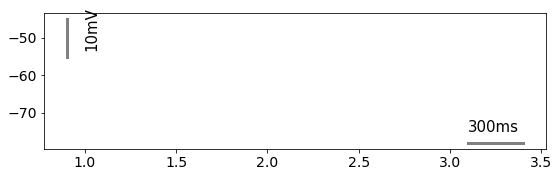

NameError: name 'SO_times' is not defined

In [11]:
from matplotlib.cm import copper

window=.9
space=.1
threshold=-45
    
Tbar, Vshift, tzoom = 200, 0, [-.5, 1]

Vm_min = 0
fig, ax = plt.subplots(1, figsize=(9, 2.5))
ax.plot(np.ones(2)*window, [-55, -45], lw=3, color='gray')
ax.annotate('10mV',(1., -45),rotation=90, fontsize=15)
ax.plot([3.1, 3.4], [-78, -78], lw=3, color='gray')
ax.annotate('300ms', (3.1, -75), fontsize=15)

for i, times in enumerate([SO_times, SA_times,
                           IA_times, BA_times]):
    for j in range(len(times))[::-1]:
        t0 = times[j]
        cond = (data['t']>t0) & (data['t']<t0+window) & (data['Vm']<threshold)
        if j==0:
            ax.plot(data['t'][cond]-t0+i*(window+space), data['Vm'][cond], 'k-', lw=1)
        else:
            ax.plot(data['t'][cond]-t0+i*(window+space), data['Vm'][cond], color='gray', lw=0.5)

for i, times in enumerate([SO_times2, SA_times2,
                           IA_times2, BA_times2]):
    for j in range(len(times))[::-1]:
        t0 = times[j]
        cond = (data2['t']>t0) & (data2['t']<t0+window) & (data2['Vm']<threshold)
        ax.plot(data2['t'][cond]-t0+i*(window+space), data2['Vm'][cond], color='gray', lw=0.5)

import matplotlib as mpl
c = plt.axes([.4, .5, .014, .18])
cmap = mpl.colors.ListedColormap(copper(np.linspace(0,1,3)))
cb = mpl.colorbar.ColorbarBase(c, cmap=cmap,
                               orientation='vertical')
cb.set_label('epoch #')
cb.set_ticks([])
        
ax.plot([0, 4*(window+space/2.)], -80.*np.ones(2), 'k:', lw=.5)
ax.annotate(str(int(-80))+'mV',(3.5, -79), fontsize=14)
set_plot(ax, [], xticks=[], yticks=[], xlim=[0, 4*(window+space)])
fig.savefig(desktop+'temp.svg')

In [9]:
SO_times, SO_times2 = [154.6, 168.11, 193.05], []
SA_times, SA_times2 = [63.7], [23.2, 30.6]
IA_times, IA_times2 = [71.59], [14., 102.55]
BA_times, BA_times2 = [164., 205.0, 192], []

In [335]:
t0 = 160
length=12.
fig = plt.figure(figsize=(9,4.5))
ax = plt.subplot2grid((3,1), (0,0), rowspan=2)
tcond = (data['sbsmpl_t']>t0) & (data['sbsmpl_t']<t0+length) & (data['sbsmpl_Vm']<-45)
ax.plot(data['sbsmpl_t'][tcond], data['sbsmpl_Vm'][tcond], 'k-', lw=.3)


In [11]:
from matplotlib.cm import copper
def make_various_samples_fig(data,
                             SO_times, SA_times,
                             Intermediate_times, BA_times,
                             ax=None, fig=None,
                             window=1, space=.2, threshold=-40):
    
    Tbar, Vshift, tzoom = 200, 0, [-.5, 1]

    Vm_min = 0
    if ax is None:
        fig, ax = plt.subplots(1, figsize=(10, 2.5))
        ax.plot(np.ones(2)*window, [-55, -45], lw=3, color='gray')
        ax.annotate('10mV',(1., -45),rotation=90, fontsize=14)
        ax.plot([3.8, 4.1], [-78, -78], lw=3, color='gray')
        ax.annotate('300ms', (3.9, -75), fontsize=14)
        
    for i, times in enumerate([SO_times, SA_times,
                               Intermediate_times, BA_times]):
        for j in range(len(times))[::-1]:
            t0 = times[j]
            if j==0:
                lw=1;c='k';sbsmpl=1
            else:
                lw=0.5;c=copper(j/(len(times)));sbsmpl=10
            cond = (data['t']>t0) & (data['t']<t0+window) & (data['Vm']<threshold)
            ax.plot(data['t'][cond][::sbsmpl]-t0+i*(window+space), data['Vm'][cond][::sbsmpl],
                    color=c, lw=lw)
            Vm_min = min([Vm_min, data['Vm'][cond].min()])
    ax.plot([0, 4*(window+space)], Vm_min*np.ones(2), 'k:')
    ax.annotate(str(int(Vm_min))+'mV',
                (-0.1, 0.), fontsize=14, xycoords='axes fraction')

    set_plot(ax, [], xticks=[], yticks=[], xlim=[0, 4*(window+space)])
    
    return fig, ax

In [12]:
SO_times = [201.7, 40.12, 196.1]
SA_times = [31.4, 12., 105]
IA_times = [18.3, 50., 56.1]
BA_times = [52.6, 60.8, 186.8]
fig, ax = make_various_samples_fig(data2,
                               SO_times, SA_times,
                               IA_times, BA_times,
                               ax = ax, fig=fig,
                               window=.9, space=.2, threshold=-35);

NameError: name 'data2' is not defined

In [32]:
SO_times = [201.7, 40.12, 196.1]
SA_times = [31.4, 12., 105]
IA_times = [18.3, 50., 56.1]
BA_times = [52.6, 60.8, 186.8]
fig, ax = make_various_samples_fig(data2,
                               SO_times, SA_times,
                               IA_times, BA_times,
                               ax = ax, fig=fig,
                               window=.9, space=.2, threshold=-35);

In [33]:
fig

In [13]:
data2 = load_data('sparse_vs_balanced/data/Awake_PVArch/Cell3/14401013.abf',args)

FileNotFoundError: [Errno 2] No such file or directory: 'sparse_vs_balanced/data/Awake_PVArch/Cell3/14401013.json'

In [14]:
from matplotlib.cm import copper
def make_various_samples_fig(t, Vm,
                             SO_times, SA_times,
                             Intermediate_times, BA_times,
                             window=1, space=.2, threshold=-30):
    
    Tbar, Vshift, tzoom = 200, 0, [-.5, 1]

    Vm_min = 0
    fig, ax = plt.subplots(1, figsize=(10, 2.5))
    for i, times in enumerate([SO_times, SA_times,
                               Intermediate_times, BA_times]):
        lw = 0.5
        for j, t0 in enumerate(times):
            if j==len(times)-1: lw=1
            cond = (t>t0) & (t<t0+window) & (Vm<threshold)
            ax.plot(t[cond]-t0+i*(window+space), Vm[cond],
                    color=copper(.8-j/len(times)), lw=lw)
            Vm_min = min([Vm_min, Vm[cond].min()])

    ax.plot([0, (i+1)*(window+space)], Vm_min*np.ones(2), 'k:')
    ax.annotate(str(int(Vm_min))+'mV',
                (-0.1, 0.), fontsize=14, xycoords='axes fraction')
    ax.plot(np.ones(2)*window, [-45, -35], lw=3, color='gray')
    ax.annotate('10mV',(-0.1, .4),
                rotation=90, fontsize=14, xycoords='axes fraction')
    ax.plot([0, 0.5], [Vm_min+1, Vm_min+1], lw=3, color='gray')
    ax.annotate('500ms',
                (0.1, -0.1), fontsize=14, xycoords='axes fraction')
    set_plot(ax, [], xticks=[], yticks=[], xlim=[0, 4*(window+space)])
    return fig


In [6]:
TIME, LOW_FREQS = get_muVs_power(t, Vm)

In [15]:
from data_analysis.freq_analysis.fourier_for_real import time_to_freq, FT
from data_analysis.processing.signanalysis import gaussian_smoothing
def get_muVs_power(t, Vm,
                        window=1., shift=.05,
                        Fmax=10., Fmin=2., subsampling=1e-2):
    TIME, LOW_FREQS = [], []
    start=0
    isub = int(subsampling/(t[1]-t[0]))
    while start<t[-1]-window:
        cond = (t>start) & (t<start+window)
        tt = t[cond][::isub]
        freqs = time_to_freq(len(tt), tt[1]-tt[0])
        TF = FT(Vm[cond][::isub], len(tt), tt[1]-tt[0])
        start+=shift
        TIME.append(start+window/2.)
        freq_cond = (freqs>Fmin) & (freqs<Fmax)
        LOW_FREQS.append(np.array(np.abs(TF)**2)[freq_cond].max())
    return np.array(TIME), np.array(LOW_FREQS)

In [7]:
def get_muV(t, Vm, TIMES,
            window=0.5, Vm_threshold=-35,
           subsampling=False):

    if subsampling: isbsmpl=10 # for debugging
    else: isbsmpl=1
    
    MUV = []
    for tt in TIMES:
        cond = (t[::isbsmpl]>tt-window/2.) &\
            (t[::isbsmpl]<tt+window/2.) & (Vm[::isbsmpl]<Vm_threshold)
        MUV.append(np.mean(Vm[::isbsmpl][cond]))
    return np.array(MUV)    

In [8]:
def get_sV(t, Vm, TIMES,
           window=0.5, Vm_threshold=-35,
           subsampling=False):

    if subsampling: isbsmpl=10 # for debugging
    else: isbsmpl=1
    
    SV = []
    for tt in TIMES:
        cond = (t[::isbsmpl]>tt-window/2.) &\
            (t[::isbsmpl]<tt+window/2.) & (Vm[::isbsmpl]<Vm_threshold)
        SV.append(np.std(Vm[::isbsmpl][cond]))
    return np.array(SV)    

In [11]:
low_freq_threshold = 0.5*LOW_FREQS.mean()
NR_TIMES = TIME[LOW_FREQS<low_freq_threshold]
muV = get_muV(t, Vm, NR_TIMES, subsampling=True)
sV = get_sV(t, Vm, NR_TIMES, subsampling=True)

In [ ]:
plt.plot(muV, sV, 'o')

In [20]:
muV, gV = get_muV_gV_relationship(t, Vm, NR_TIMES, MUV, subsampling=True)
cond = (muV>-65) & (muV<-50)
plt.plot(muV[cond], gV[cond], 'o')

In [16]:
from scipy.stats import skew

def get_muV_gV_relationship(t, Vm, NR_TIMES, MUV,
                            window=0.5,
                            Vm_threshold=-35,
                            muV_discret=40,
                            subsampling=False):

    if subsampling: isbsmpl=10 # for debugging
    else: isbsmpl=1
        
    muV = np.linspace(MUV.min(), MUV.max(), muV_discret+1)
    GV, N = np.zeros(muV_discret), np.zeros(muV_discret, dtype=int)
    for k, muV1, muV2 in zip(range(muV_discret), muV[:-1], muV[1:]):
        vm_full = []
        i0 = np.argwhere((MUV>=muV1) & (MUV<=muV2)).flatten()
        N[k] = len(i0) # storing the number of episodes contributing
        if N[k]>0:
            for ii in i0:
                cond = (t[::isbsmpl]>NR_TIMES[ii]-window/2.) &\
                    (t[::isbsmpl]<NR_TIMES[ii]+window/2.) &\
                    (Vm[::isbsmpl]<Vm_threshold)
                vm_full+=list(Vm[::isbsmpl][cond])
            GV[k] = skew(vm_full)
        else:
            GV[k] = 0
            
    return .5*(muV[1:]+muV[:-1]), GV

In [47]:
muV, Tv = get_muV_Tv_relationship(t, Vm, NR_TIMES, MUV, subsampling=False)

In [48]:
plt.plot(muV, 1e3*Tv, 'o')

In [45]:
from scipy.stats import skew, pearsonr
from data_analysis.processing.signanalysis import autocorrel
from scipy.optimize import minimize
                 
def get_muV_Tv_relationship(t, Vm, NR_TIMES, MUV,
                            window=300e-3,
                            Vm_threshold=-35,
                            muV_discret=20,
                            max_time=100e-3,
                            min_time=1e-3,
                            subsampling=False):

    if subsampling: isbsmpl=10 # for debugging
    else: isbsmpl=1
    dt = t[isbsmpl]-t[0]
    
    # just one to get the right size
    acf, shift = autocorrel(Vm[::isbsmpl][t[::isbsmpl]<0.5], max_time, dt)
           
    muV = np.linspace(MUV.min(), MUV.max(), muV_discret+1)
    Tv, N = np.zeros(muV_discret), np.zeros(muV_discret, dtype=int)
    for k, muV1, muV2 in zip(range(muV_discret), muV[:-1], muV[1:]):
        acf = 0.*shift
        i0 = np.argwhere((MUV>=muV1) & (MUV<=muV2)).flatten()
        N[k] = len(i0) # storing the number of episodes contributing
        if N[k]>0:
            for ii in i0:
                cond = (t[::isbsmpl]>NR_TIMES[ii]-window/2.) &\
                    (t[::isbsmpl]<NR_TIMES[ii]+window/2.) &\
                    (Vm[::isbsmpl]<Vm_threshold)
                acf0, _ = autocorrel(Vm[::isbsmpl][cond], max_time, dt)
                acf+=acf0/len(i0)
            def func(X):
                return np.sum(np.abs(np.exp(-shift/X[0])-acf))
            res = minimize(func, [min_time],
                           bounds=[[min_time, max_time]], method='L-BFGS-B')
            Tv[k] = res.x[0]
        else:
            Tv[k] = np.inf
        plt.plot(shift, acf)
    return .5*(muV[1:]+muV[:-1]), Tv


In [2]:
from data_analysis.IO.load_data import load_file
data = load_file('sparse_vs_balanced/data/Wild_Type/Cell14/17o27001.abf')
t, Vm, LFP = data[0], data[1][1], data[1][0]

In [9]:
from data_analysis.IO.load_data import load_file
data = load_file('17o27001.abf')
t, Vm, LFP = data[0], data[1][1], data[1][0]
sub_dt = int(1e-3/t[1])
print(sub_dt)                                                                   Vm[::sub_dt].tofile('sample_Vm.dat')
LFP[::sub_dt].tofile('sample_LFP.dat')                                          

20


In [10]:
Vm[::sub_dt].tofile('sample_Vm.dat')
LFP[::sub_dt].tofile('sample_LFP.dat')                                           

In [26]:
fig, AX = plt.subplots(2)
AX[0].plot(t[::10], LFP[::10])
AX[1].plot(t[::10], Vm[::10])                                           

In [27]:
# so we 
t, Vm, LFP = t[t<200], Vm[t<200], LFP[t<200]

In [28]:
fig, AX = plt.subplots(2)
AX[0].plot(t[::10], LFP[::10])
AX[1].plot(t[::10], Vm[::10])                                           

In [56]:
def show_vm_and_lfp(t0, width):
    fig = plt.figure(figsize=(10,3))
    cond = (t>t0) & (t<t0+width) #& (Vm<-30)
    ax = plt.subplot2grid((4, 1), (0, 0))
    ax.plot(t[cond], LFP[cond], 'k-')
    ax.plot([t[cond][-1]-1, t[cond][-1]-1], ax.get_ylim()[0]+.5*np.arange(2), '-', lw=2, color=Grey)
    ax.annotate('500$\mu$V', (t[cond][-1]-2.1, ax.get_ylim()[0]), fontsize=20)
    set_plot(ax, [], xlim=[t[cond][0], t[cond][-1]], xticks=[], yticks=[])
    ax = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    ax.plot(t[cond], Vm[cond], 'k-')
    ax.plot([t[cond][0], t[cond][0]+1], [-35,-35], '-', lw=2, color=Grey);ax.annotate('1s', (t[cond][0]+.2, -33), fontsize=20)
    ax.plot([t[cond][-1]-1, t[cond][-1]-1], [-45,-35], '-', lw=2, color=Grey);ax.annotate('5mV', (t[cond][-1]-2.1, -40), fontsize=20)
    set_plot(ax, [], xlim=[t[cond][0], t[cond][-1]], xticks=[], yticks=[])
    return fig
fig = show_vm_and_lfp(100, 10)    

In [57]:
fig = show_vm_and_lfp(166, 10)    

In [59]:
from data_analysis.freq_analysis.fourier_for_real import time_to_freq, FT
from data_analysis.processing.signanalysis import gaussian_smoothing
def get_Vm_power(t, Vm,
                 window=1., shift=.05,
                 Fmax=10., Fmin=2., subsampling=1e-2):
    TIME, LOW_FREQS = [], []
    start=0
    isub = int(subsampling/(t[1]-t[0]))
    while start<t[-1]-window:
        cond = (t>start) & (t<start+window)
        tt = t[cond][::isub]
        freqs = time_to_freq(len(tt), tt[1]-tt[0])
        TF = FT(Vm[cond][::isub], len(tt), tt[1]-tt[0])
        start+=shift
        TIME.append(start+window/2.)
        freq_cond = (freqs>Fmin) & (freqs<Fmax)
        LOW_FREQS.append(np.array(np.abs(TF)**2)[freq_cond].max())
    return np.array(TIME), np.array(LOW_FREQS)

In [60]:
T, P = get_Vm_power(t, Vm)

In [63]:
def show_vm_and_lfp(t0, width):
    fig = plt.figure(figsize=(10,3))
    cond = (t>t0) & (t<t0+width) #& (Vm<-30)
    ax = plt.subplot2grid((4, 1), (0, 0))
    ax.plot(t[cond], LFP[cond], 'k-')
    ax.plot([t[cond][-1]-1, t[cond][-1]-1], ax.get_ylim()[0]+.5*np.arange(2), '-', lw=2, color=Grey)
    ax.annotate('500$\mu$V', (t[cond][-1]-2.1, ax.get_ylim()[0]), fontsize=20)
    set_plot(ax, [], xlim=[t[cond][0], t[cond][-1]], xticks=[], yticks=[])
    ax = plt.subplot2grid((4, 1), (2, 0), rowspan=2)
    ax.plot(t[cond], Vm[cond], 'k-')
    ax.plot([t[cond][0], t[cond][0]+1], [-35,-35], '-', lw=2, color=Grey);ax.annotate('1s', (t[cond][0]+.2, -33), fontsize=20)
    ax.plot([t[cond][-1]-1, t[cond][-1]-1], [-45,-35], '-', lw=2, color=Grey);ax.annotate('5mV', (t[cond][-1]-2.1, -40), fontsize=20)
    set_plot(ax, [], xlim=[t[cond][0], t[cond][-1]], xticks=[], yticks=[])
    ax = plt.subplot2grid((4, 1), (1, 0))
    cond = (T>t0) & (T<t0+width) #& (Vm<-30)
    ax.plot(T[cond], P[cond], 'k-')
    set_plot(ax, [], xlim=[T[cond][0], T[cond][-1]], xticks=[], yticks=[])
    return fig
fig = show_vm_and_lfp(100, 10)    

In [66]:
show_vm_and_lfp(150, 30);    

In [171]:
show_vm(200, 20)    

In [22]:
from matplotlib.cm import copper
# Chosen_Episodes = [1, 5, 9, 13, 19, 21, 30, 26, 46] 
Chosen_Episodes = [5, 9, 19, 21, 30, 46, 13, 26] 
# Chosen_Episodes = [1, 5, 9, 11, 13, 19, 21, 30, 26, 46] 
# Chosen_Episodes = [1, 5, 9, 11, 13, 19, 21, 30, 46, 26] 
BA_Episodes = [34] 
fig = make_PV_Arch_fig(Chosen_Episodes, BA_Episodes);
fig.savefig(desktop+'temp.svg')

In [21]:
def make_PV_Arch_fig(Chosen_Episodes, BA_Episodes):
    Tbar, Vshift, tzoom = 200, 0, [-.5, 1]

    fig, ax = plt.subplots(1, figsize=(5, 3))
    for i, iepisode in enumerate(Chosen_Episodes):
        t0 = t[Light_indices[iepisode]]
        cond = (t>t0+tzoom[0]) & (t<t0+tzoom[1])
        ax.plot(1e3*(t[cond]-t0), Vm[cond]+Vshift*i, color=copper(1-i/len(Chosen_Episodes)/1.5),lw=0.5)
    ax.plot(1e3*(t[cond]-t0), Vm[cond]+Vshift*i, color='k', lw=1)
    ax.plot(1e3*tzoom[0]*np.ones(2), [-45, -35], lw=3, color='gray')
    ax.annotate('10mV',(-0.1, .4), rotation=90, fontsize=14, xycoords='axes fraction')
    ax.plot([1e3*tzoom[0],1e3*tzoom[0]+Tbar], [-75, -75], lw=3, color='gray')
    ax.annotate(str(Tbar)+' ms',
                (0.1, -0.1), fontsize=14, xycoords='axes fraction')
    ax.fill_between(t[cond],
                    ax.get_ylim()[0]+0.*t[cond],
                    ax.get_ylim()[0]+Iapp[cond]*(ax.get_ylim()[1]-ax.get_ylim()[0]), color='y', alpha=.2)
    set_plot(ax, [], xticks=[], yticks=[])
    # one BA episode in inset
    ax2 = plt.axes((.7,.6, .2, .3))
    tzoom = [-1, 1]
    for i, iepisode in enumerate(BA_Episodes):
        t0 = t[Light_indices[iepisode]]
        cond = (t>t0+tzoom[0]) & (t<t0+tzoom[1])
        ax2.plot(1e3*(t[cond]-t0), Vm[cond]+Vshift*i, color=copper(i/len(BA_Episodes)/2.),lw=0.5)
    ax2.fill_between([0, 400], ax.get_ylim()[0]*np.ones(2), ax.get_ylim()[1]*np.ones(2), color='y', alpha=.2)
    set_plot(ax2, [], xticks=[], yticks=[])
    return fig

In [225]:
from data_analysis.freq_analysis.wavelet_transform import my_cwt

In [341]:
N = 4 # subsampling
sbsmpl_t, sbsmpl_Vm, sbsmpl_dt  = t[::N], Vm[::N], t[N]-t[0]
# wavelet_coeffs = my_cwt(sbsmpl_Vm, np.linspace(2, 10, 6), dt).mean(axis=0)
# wavelet_coeffs2 = my_cwt(sbsmpl_Vm, np.linspace(20, 100, 10), dt).mean(axis=0)
# wavelet_coeffs = wavelet_coeffs1/(1+wavelet_coeffs2)

In [356]:
from data_analysis.processing.filters import butter_bandpass_filter, butter_lowpass_filter

low_freqs = butter_bandpass_filter(sbsmpl_Vm,
                                   1., 10.,
                                   1./sbsmpl_dt, order=1)
t0, width = 50, 20
######### Vm
fig = plt.figure(figsize=(17,3))
cond = (sbsmpl_t>t0) & (sbsmpl_t<t0+width)
plt.plot(sbsmpl_t[cond], low_freqs[cond])

In [317]:
Twindow = 0.2
iw = int(Twindow/sbsmpl_dt)
i = 0
var_wvltcoeffs, t_var = [], []
while i<len(sbsmpl_t):
    t_var.append(sbsmpl_t[i:i+iw].mean())
    var_wvltcoeffs.append(wavelet_coeffs[i:i+iw].std())
    i+=int(iw/4)
var_wvltcoeffs = np.array(var_wvltcoeffs)

In [318]:
from data_analysis.processing.signanalysis import gaussian_smoothing
Tsmooth = 0.05
smooth_wvltcoeffs = gaussian_smoothing(np.abs(var_wvltcoeffs), int(Tsmooth/(t_var[1]-t_var[0])))